In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import folium

In [2]:
df_london = pd.read_csv('london_crime_by_lsoa.csv')
print('Dataset berhasil diinput')

Dataset berhasil diinput


In [3]:
#melihat 5 baris pertama pada dataset
df_london.head() 

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
#melihat 5 baris terakhir pada dataset
df_london.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
#List Header dari dataset
df_london.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [7]:
df_london.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [8]:
df_london.shape

(13490604, 7)

In [9]:
df_london.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [10]:
df_london.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [11]:
#memfilter kolom mana yang ingin ditampilkan
df_london.borough

0              Croydon
1            Greenwich
2              Bromley
3            Redbridge
4           Wandsworth
               ...    
13490599         Brent
13490600    Hillingdon
13490601        Sutton
13490602       Croydon
13490603        Merton
Name: borough, Length: 13490604, dtype: object

In [12]:
years = df_london.groupby('year').count().index
years

Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='year')

In [13]:
months = df_london.groupby('month').count().index
months

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

In [14]:
borough_ = df_london.groupby('borough').count().index
borough_

Index(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype='object', name='borough')

In [15]:
major_categories = df_london.groupby("major_category").count().index
major_categories

Index(['Burglary', 'Criminal Damage', 'Drugs', 'Fraud or Forgery',
       'Other Notifiable Offences', 'Robbery', 'Sexual Offences',
       'Theft and Handling', 'Violence Against the Person'],
      dtype='object', name='major_category')

In [16]:
minor_categories = df_london.groupby("minor_category").count().index
minor_categories

Index(['Assault with Injury', 'Burglary in Other Buildings',
       'Burglary in a Dwelling', 'Business Property', 'Common Assault',
       'Counted per Victim', 'Criminal Damage To Dwelling',
       'Criminal Damage To Motor Vehicle', 'Criminal Damage To Other Building',
       'Drug Trafficking', 'Going Equipped', 'Handling Stolen Goods',
       'Harassment', 'Motor Vehicle Interference & Tampering', 'Murder',
       'Offensive Weapon', 'Other Criminal Damage', 'Other Drugs',
       'Other Fraud & Forgery', 'Other Notifiable', 'Other Sexual',
       'Other Theft', 'Other Theft Person', 'Other violence',
       'Personal Property', 'Possession Of Drugs', 'Rape',
       'Theft From Motor Vehicle', 'Theft From Shops',
       'Theft/Taking Of Motor Vehicle', 'Theft/Taking of Pedal Cycle',
       'Wounding/GBH'],
      dtype='object', name='minor_category')

# Bar Charts
Bar chart digunakan untuk membandingkan beberapa kategori dengan berbagai macam nilai atau jumlah. Disini Bar Chart digunakan untuk membandingkan jumlah kejahatan dalam kategori major yang terjadi di borough Croydon. Tinggi batang mewakili jumlah kejahatan yang terjadi di setiap kategori, untuk sumbu x merepresentasikan Kategori kejahatan major dan sumbu y merepresentasikan jumlah setiap kejahatannya.

In [17]:
Croydon_data = df_london[df_london['borough'] == 'Croydon']
Croydon_ = Croydon_data.groupby(['major_category'])['value'].sum().reset_index()
Croydon_

,major_category,value
0,Burglary,33376
1,Criminal Damage,31218
2,Drugs,19162
3,Fraud or Forgery,270
4,Other Notifiable Offences,4340
5,Robbery,12645
6,Sexual Offences,55
7,Theft and Handling,91437
8,Violence Against the Person,67791


In [18]:
Croydon_.sort_values(['value'], ascending=False, axis=0, inplace=True)
Croydon_Top5 = Croydon_.head()
Croydon_Top5

,major_category,value
7,Theft and Handling,91437
8,Violence Against the Person,67791
0,Burglary,33376
1,Criminal Damage,31218
2,Drugs,19162


In [19]:
Croydon_Top5.set_index('major_category', inplace=True)
Croydon_Top5

,value
major_category,
Theft and Handling,91437
Violence Against the Person,67791
Burglary,33376
Criminal Damage,31218
Drugs,19162


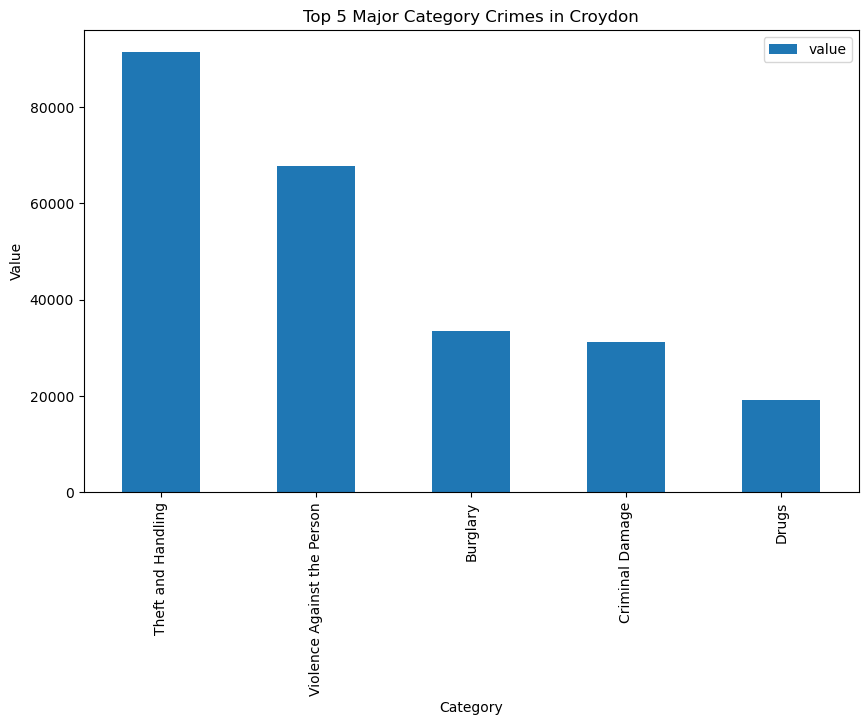

In [20]:
Croydon_Top5.plot(kind = 'bar', 
                  figsize = (10, 6),
                 )
plt.title('Top 5 Major Category Crimes in Croydon')
plt.ylabel('Value')
plt.xlabel('Category')
plt.show()

Dari visualisasi menggunakan bar charts tersebut dapat disimpulkan bahwa dari 9 Major Crime Category terdapat 5 jenis kejahatan yang paling sering terjadi di borough Croydon yang dapat dilihat pada bar charts di atas dan juga Major Crime Category paling tinggi terjadi yaitu pada kategori Theft and Handling.

# Pie Charts
Pie Charts biasa digunakan untuk menampilkan proporsi numerik dengan membagi lingkaran menjadi irisan yang proposional ke dalam bagian atau kategori secara keseluruhan. 

In [21]:
limit = 'City of London'
df_london= df_london.loc[0:limit, :]

In [22]:
df_cl = df_london.groupby(['major_category'])['value'].sum().reset_index()
df_cl

,major_category,value
0,Burglary,754293
1,Criminal Damage,630938
2,Drugs,470765
3,Fraud or Forgery,5325
4,Other Notifiable Offences,106349
5,Robbery,258873
6,Sexual Offences,1273
7,Theft and Handling,2661861
8,Violence Against the Person,1558081


In [23]:
df_cl.set_index('major_category', inplace=True)

In [24]:
df_cl.dtypes

value    int64
dtype: object

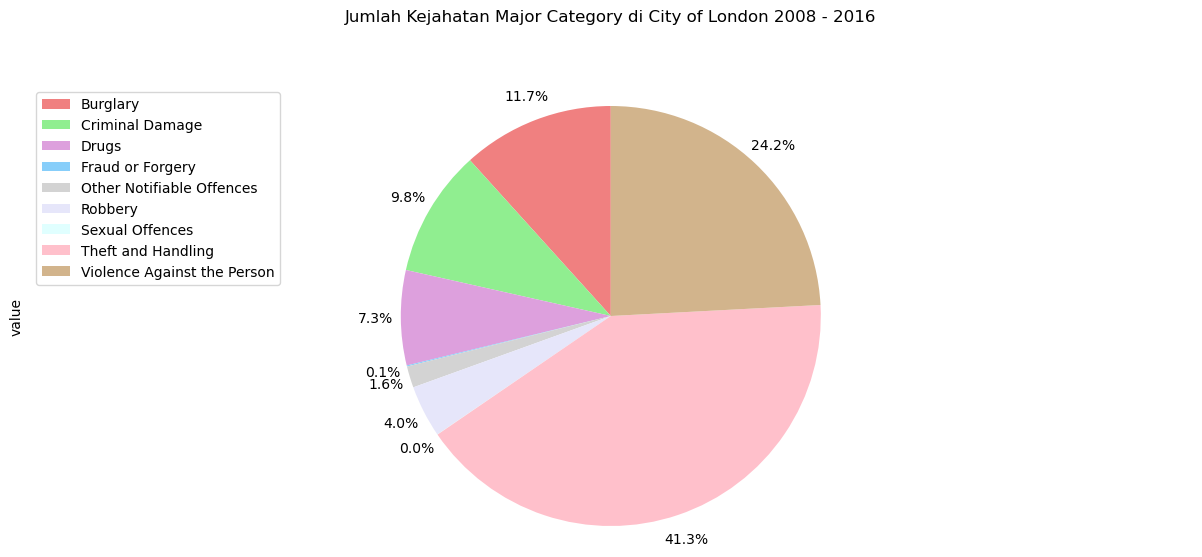

In [25]:
colors_list = ['lightcoral', 'lightgreen', 'plum', 'lightskyblue', 'lightgrey', 'lavender', 'lightcyan', 'pink', 'tan']
df_cl['value'].plot(kind='pie', 
                    figsize=(15, 6), 
                    autopct ='%1.1f%%', 
                    startangle = 90, 
                    labels=None, 
                    pctdistance = 1.12,
                    colors = colors_list)
plt.title('Jumlah Kejahatan Major Category di City of London 2008 - 2016', y = 1.12)
plt.axis('equal')
plt.legend(labels=df_cl.index, loc='upper left')
plt.show()

Dari pie charts diatas kita dapat menyimpulkan bahwa di Borough City of London persentase Major Crime Category tertinggi pada kejahatan Theft and handling dengan 41.3% yang berarti bahwa theft and handling sangat sering terjadi di City of London.

# Area Plot
Dari Area Plot yang dibuat kita dapat mengetahui apakah suatu data terjadi peningkatan atau penurunan. Dimana kita dapat mengetahui perubahan relatif yang terjadi pada data.

In [26]:
df_years = df_london.groupby(['borough', 'year'])['value'].sum().reset_index()

In [27]:
df_years = pd.DataFrame(df_years)
df_years.head()

,borough,year,value
0,Barking and Dagenham,2008,17656
1,Barking and Dagenham,2009,17713
2,Barking and Dagenham,2010,17130
3,Barking and Dagenham,2011,16686
4,Barking and Dagenham,2012,15990


In [28]:
df_Years = df_years.pivot(index='year', columns='borough', values='value')
df_Years.index.name = 'Borough'
df_Years.columns.name = None
df_Years

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Borough,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


In [29]:
Total_perYears = df_Years.sum()

In [30]:
df_Top5 = Total_perYears.nlargest(6).index
borough_Top5 = df_Years[df_Top5].head(9)

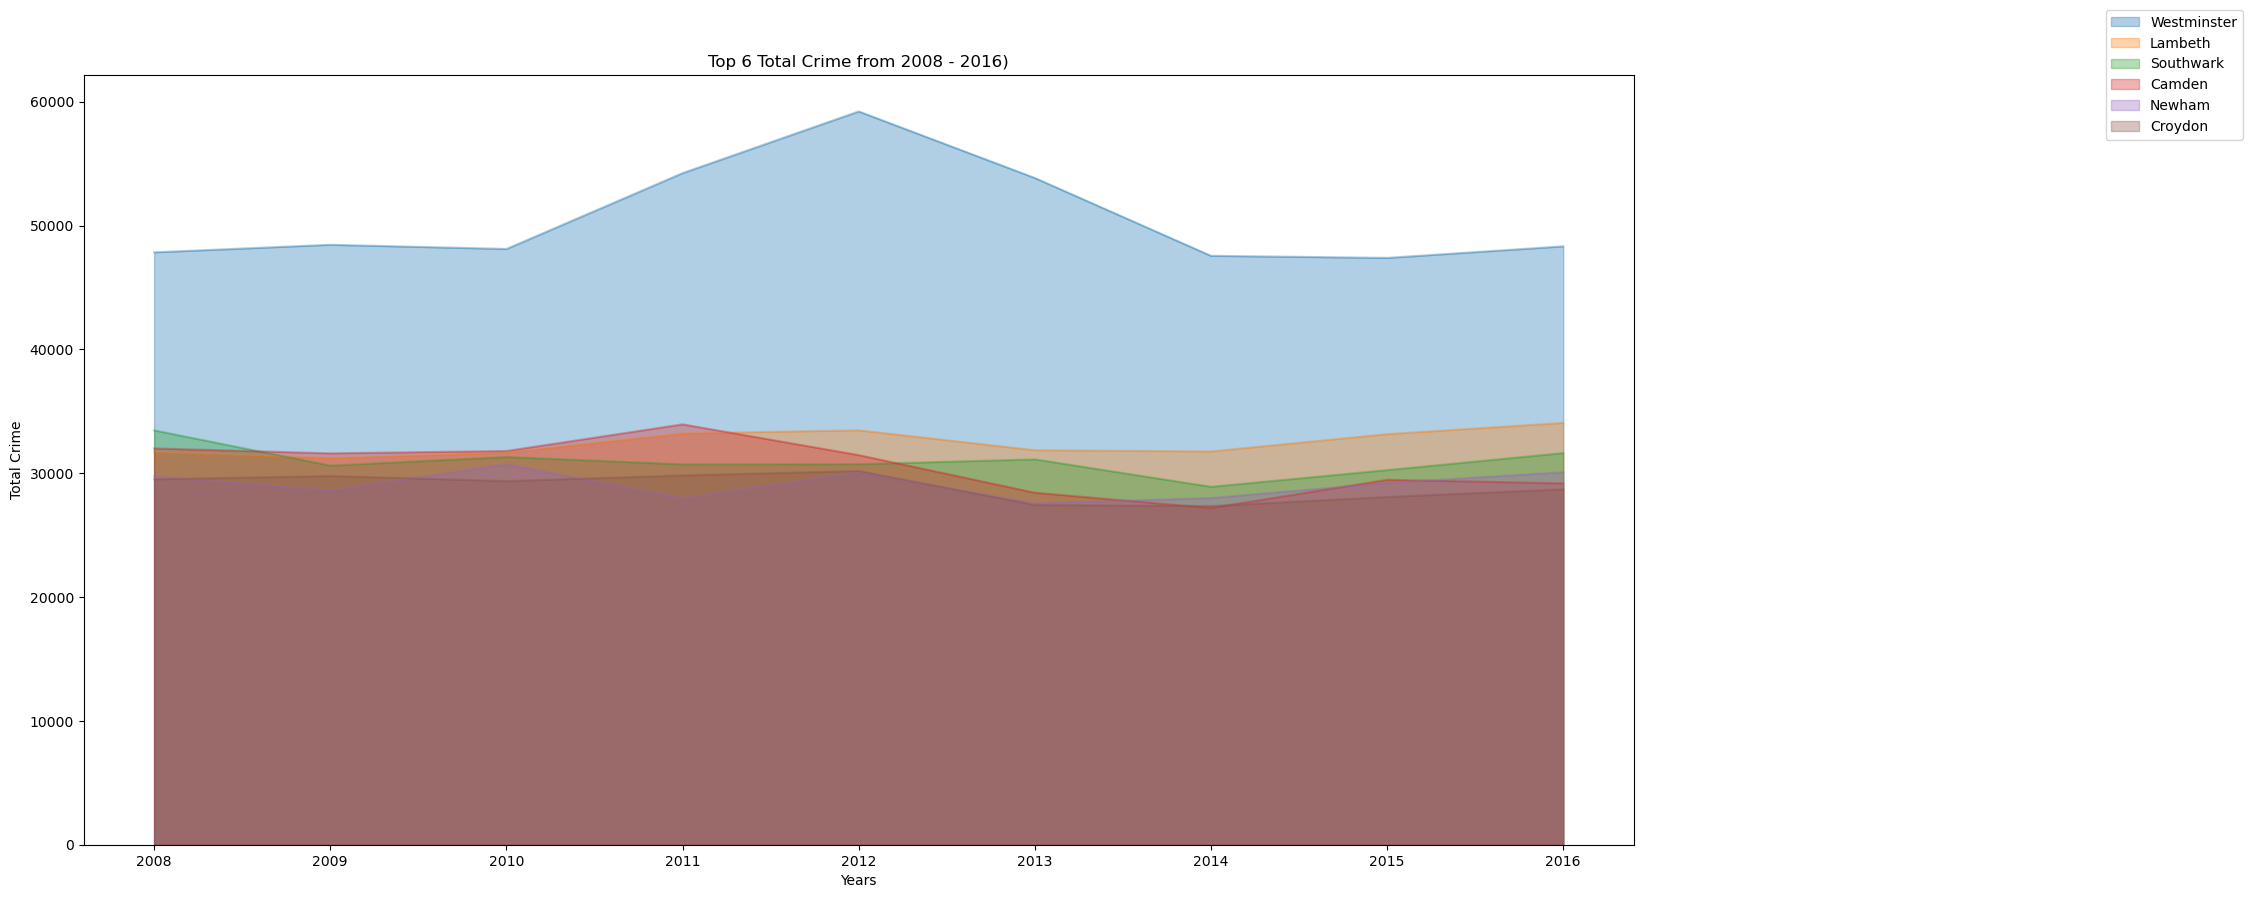

In [56]:
borough_Top5.plot(kind='area', 
                  alpha=0.35, 
                  stacked=False, 
                  figsize=(20, 10))
plt.legend(loc='center left', bbox_to_anchor=(1.3, 1))
plt.title('Top 6 Total Crime from 2008 - 2016)')
plt.ylabel('Total Crime')
plt.xlabel('Years')
plt.show()

Dari Area Plot yang dibuat kita dapat mengetahui borough dengan tingkat kejahatan tertinggi setiap tahunnya serta kita dapat melihat perubahan jumlah kejahatan suatu borough setiap tahun tahun dari tahun 2008 sampai dengan 2016. Dengan menggunakan Area plot kita dapat mengetahui apakah tingkat kejahatannya menurun atau meningkat setiap tahunnya

Dari Area Plot tersebut dapat kita simpulkan bahwa Jumlah Kejahatan yang paling tinggi setiap tahunnya berada di borough westminster, kemudian pada tahun 2011 Terjadi peningkatan kejahatan di westminster namun pada 2014 tingkat kejahatannya mulai menurun.

# Histogram 
Histogram digunakan untuk merepresentasikan distribusi frekuensi dari dataset dengan mengemlompokkan data ke dalam suatu kelompok lalu menghitung berapa banyak data yang termasuk ke dalam kelompok tersebut. Pada bagian dataset ini histogram digunakan untuk merepresentasikan jumlah kejahatan yang terjadi di London pada tahun 2008, kemudian data jumlah kejahatan tersebut dikelompokkan ke dalam bin dan dihitung ada berapa banyak negara/borough pada setiap bin. 

In [32]:
df_borough = df_years.pivot(index='borough', columns='year', values='value')
df_borough

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
City of London,0,0,0,69,157,110,115,151,178
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127


In [33]:
df_borough.index.name = 'borough'
df_borough.columns.name = None
df_borough

,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
City of London,0,0,0,69,157,110,115,151,178
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127


In [34]:
df_borough[2008].head()

borough
Barking and Dagenham    17656
Barnet                  23944
Bexley                  15305
Brent                   23504
Bromley                 24015
Name: 2008, dtype: int64

In [35]:
boro, bin_edges = np.histogram(df_borough[2008])
print(boro)
print(bin_edges)

[ 1  0  5  3 10  7  6  0  0  1]
[    0.   4784.6  9569.2 14353.8 19138.4 23923.  28707.6 33492.2 38276.8
 43061.4 47846. ]


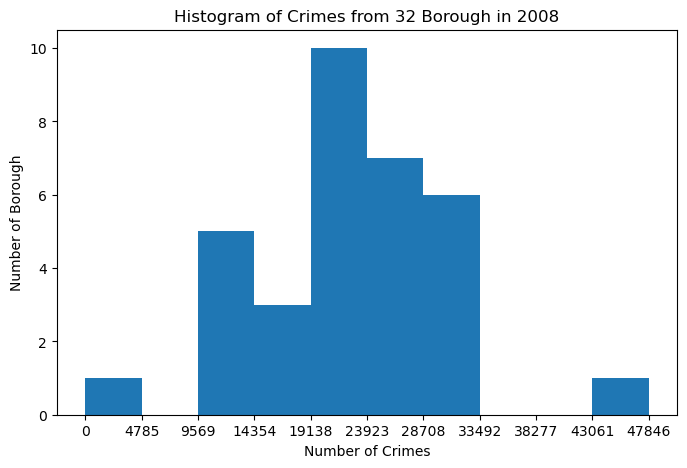

In [36]:
boro, bin_edges = np.histogram(df_borough[2008])
df_borough[2008].plot(kind = 'hist', figsize =(8, 5), xticks = bin_edges)
plt.title('Histogram of Crimes from 32 Borough in 2008')
plt.ylabel('Number of Borough')
plt.xlabel('Number of Crimes')
plt.show()

Dari Histogram tersebut dapat kita simpulkan bahwa dari 32 borough terdapat 1 borough dengan rentang jumlah kejahatan 0 sampai 4785, 5 borough dengan rentang jumlah kejahatan sekitar 9569 sampai 14354, 3 borough dengan rentang jumlah kejahatan sekitar 14354 sampai 19138, 10 borough dengan rentang jumlah kejahatan sekitar 19138 sampai 23923, 7 borough dengan rentang kejahatan sekitar 23923 sampai dengan 28708 dan 1 borough dengan rentang jumlah kejahatan sekitar 43061 sampai 47846. 

# Box Plot
box plot biasa digunakan untuk menampilkan atau mengidentifikasi outlier yang menyajikan informasi penting seperti median, kuartil serta batas atas dan bawah. Box plot digunakan untuk mengeksplorasi data serta membandingkan kelompok data secara ringkas dan informatif.

In [37]:
df_Years

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Borough,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


In [38]:
df_box = df_borough.loc[(['Tower Hamlets', 'Brent'])].transpose()
df_box.head()

borough,Tower Hamlets,Brent
2008,23578,23504
2009,21959,24748
2010,23072,25512
2011,24712,27669
2012,26784,26357


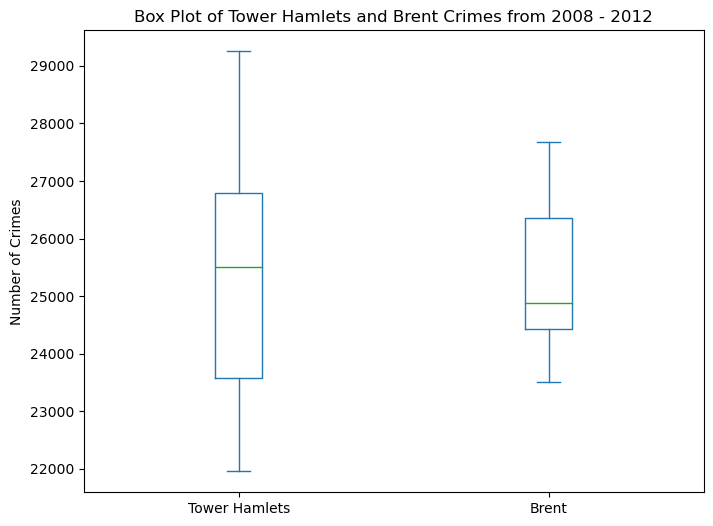

In [39]:
df_box.plot(kind='box', figsize=(8, 6))

plt.title('Box Plot of Tower Hamlets and Brent Crimes from 2008 - 2012')
plt.ylabel('Number of Crimes')
plt.show()

Dari Box plot diatas kita dapat mengetahui bahwa jumlah kejahatan dari tahun 2008 sampai 2012 di Tower Hamlets adalah maksimal sekitar 29000, median sekitar 25500 dengan nilai quartil pertama 23500 dan quartil ketiga 27000 dan paling kecil jumlah terjadinya kejahatan adalah 22000. Sedangkan jumlah kejahatan dari tahun 2008 sampai 2012 di Brent terjadi kejahatan dengan nilai maksimum sebanyak sekitar 27500, median 24500 dengan nilai quartil pertama sekitar 24000 dan quartil ketiga sekitar 26000 serta jumlah kejahatan minimum terjadi sekitar 24000. Sehingga dapat disimpulkan bahwa kejahatan yang terjadi di Tower Hamlets lebih sering terjadi dibandingkan kejahatan yang terjadi di Brent

# Scatter Plots
Scatter Plots merupakan salah satu metode yang digunakan untuk membandingkan variable satu sama lain dengan menggunakan titik yang tersebar pada bidang kartesian yang digunakan untuk mengidentifikasi hubungan antara 2 variabel. 

In [40]:
df_borough3 = df_borough.loc[(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'])].transpose()
df_total = pd.DataFrame(df_borough3.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329


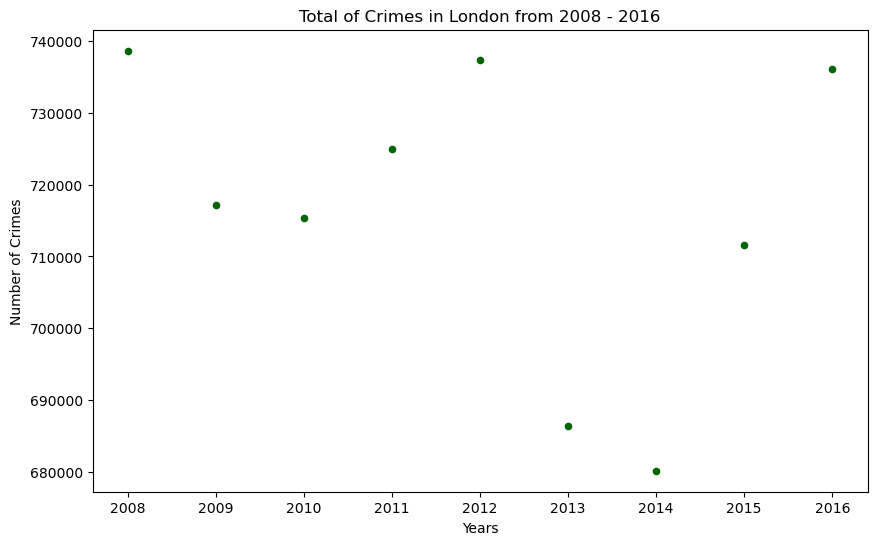

In [41]:
df_total.plot(kind='scatter', x = 'year', y = 'total', figsize =(10,6), color='darkgreen')
plt.title('Total of Crimes in London from 2008 - 2016')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')
plt.show()

Berdasarkan Scatter plot diatas dapat diambil kesimpulan bahwa total kejahatan di London dari tahun 2008 ke tahun 2009 mengalami penurunan yang cukup jauh, kemudian dari tahun 2009 ke 2010 juga mengalami penurunan dan selanjut pada tahun 2011 kejahatan di London kembali meningkat cukup tinggi dan semakin meningkat pada tahun 2012. Lalu pada tahun 2013 dan 2014 kejahatan di London menurun sangat jauh dibanding tahun tahun sebelumnya, namun pada tahun 2015 kejahatan kembali meningkat dan terus meningkat sampai dengan tahun 2016

# Word Clouds

Word Clouds biasa digunakan untuk melakukan analisis tingkat tinggi dan merupakan visualisasi data teks, cara kerja word clouds ini cukup sederhana dimana semakin banyak kata muncul dalam data maka akan semakin besar dan tebal kata itu muncul di word clouds

In [42]:
tot_crime = df_london.groupby(['borough'])['value'].sum().reset_index()

In [43]:
tot_crime

,borough,value
0,Barking and Dagenham,149447
1,Barnet,212191
2,Bexley,114136
3,Brent,227551
4,Bromley,184349
5,Camden,275147
6,City of London,780
7,Croydon,260294
8,Ealing,251562
9,Enfield,193880


In [44]:
stopwords = set(STOPWORDS)

In [45]:
crime_word = tot_crime.set_index(['borough'])['value'].to_dict()

In [46]:
london_wc = WordCloud(
    background_color='white',
    max_words= 50,
    stopwords= stopwords,
    width = 1350,
    height = 1050
)
london_wc.generate_from_frequencies(crime_word)

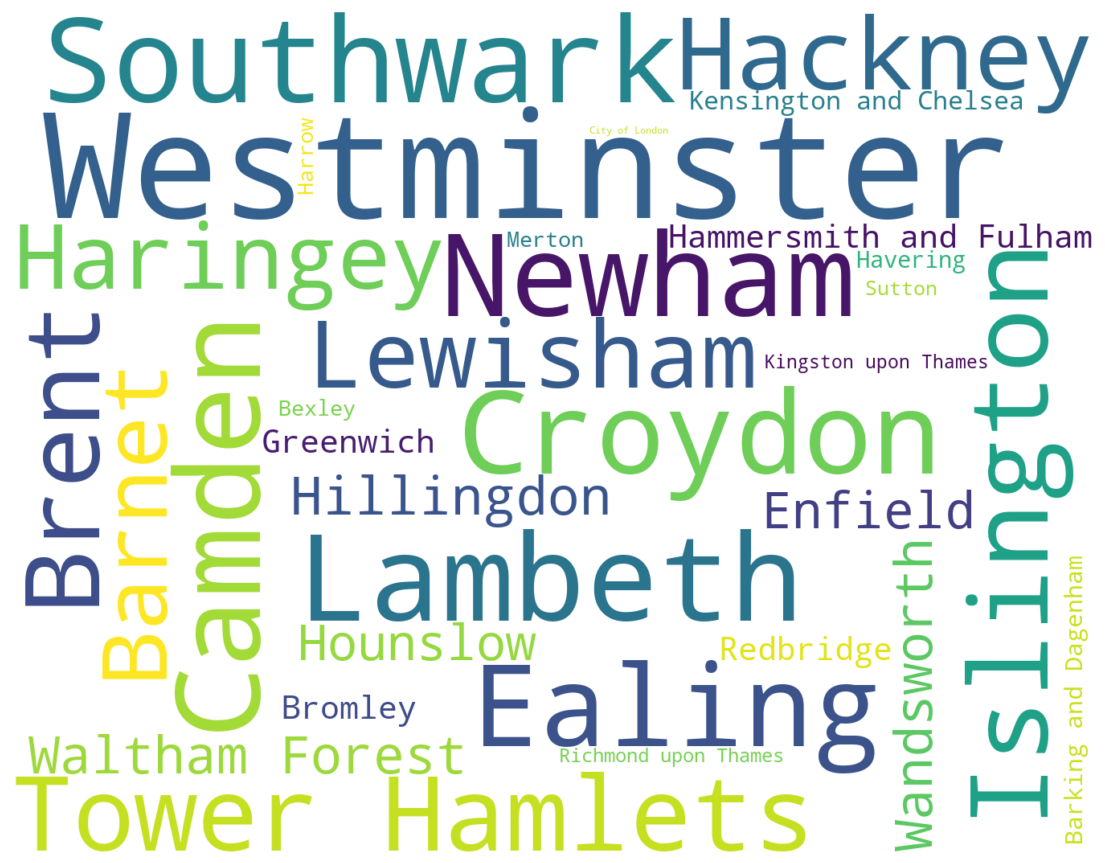

In [47]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(london_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [48]:
df_borough

,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
City of London,0,0,0,69,157,110,115,151,178
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127


In [49]:
df_borough['Total'] = df_borough.loc[:, 2008:2013].sum(axis=1)

In [50]:
total_crime = df_borough['Total'].sum()
total_crime

4319830

In [51]:
max_word = 100
word_string = ''
for borough in df_borough.index.values :
    borough_str = str(borough)
    if len(borough_str.split(' ')) == 1:
        repeat_num_times = int(df_borough.loc[borough, 'Total']/float(total_crime)*max_word)
        word_string = word_string + ((borough_str + ' ') * repeat_num_times)
word_string

'Barnet Barnet Barnet Bexley Brent Brent Brent Bromley Bromley Camden Camden Camden Camden Croydon Croydon Croydon Croydon Ealing Ealing Ealing Ealing Enfield Enfield Greenwich Greenwich Hackney Hackney Hackney Haringey Haringey Haringey Harrow Havering Havering Hillingdon Hillingdon Hillingdon Hounslow Hounslow Islington Islington Islington Lambeth Lambeth Lambeth Lambeth Lewisham Lewisham Lewisham Merton Newham Newham Newham Newham Redbridge Redbridge Southwark Southwark Southwark Southwark Sutton Wandsworth Wandsworth Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster Westminster '

In [52]:
wordcloud = WordCloud(background_color='white',  width = 1350, height = 1050).generate(word_string)
print('Word cloud created!')

Word cloud created!


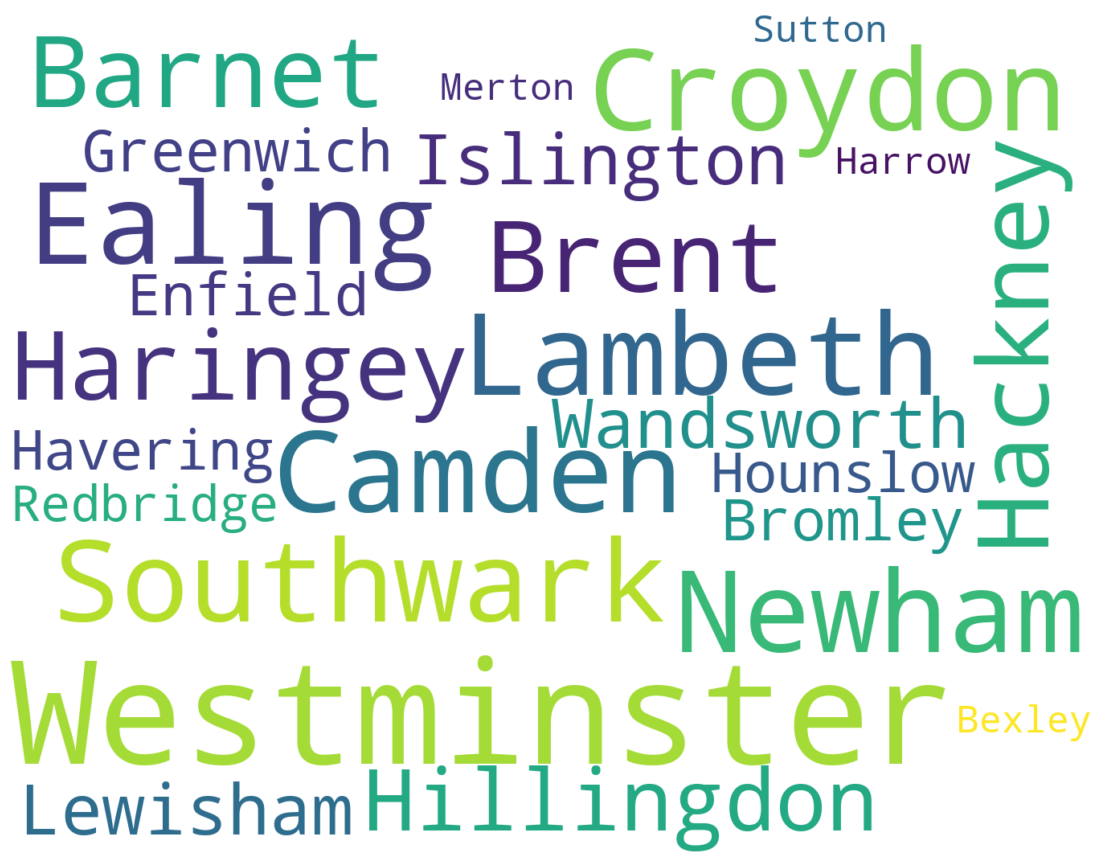

In [53]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Berdasarkan word clouds diatas dapat diketahui bahwa pada data set tersebut data terbanyak dimiliki oleh westminster dimana pada word clouds kata westminster merupakan kata terbesar dan tebal. 

Dari visualisasi diatas dapat ditarik kesimpulan bahwa dari jumlah kejahatan yang terjadi di London adapun borough yang mengalami tingkat kejahatan paling tinggi berada di borough Westminter. Kejahatan yang terjadi di westminter mengalami kenaikan yang sangat tinggi pada tahun 2012 dan setelah itu mengalami penurunan namun tetap menjadi borough dengan kejahatan paling sering terjadi. Dari 32 Borough terdapat 10 borough dengan jumlah kejahatan diantara 19138 sampai dengan 23923. Jumlah kejahatan paling tinggi yang terjadi di Tower Hamlets maksimal sebanyak sekitar 29000 dengan median sekitar 25500. Adapun Major Category yang paling sering terjadi di Croydon adalah Theft and Handling. Theft and Handling juga sangat sering terjadi di borough lain seperti City of London. Setiap tahunnya kejahatan yang terjadi di london mengalami penurunan ataupun kenaikan dimana pada tahun 2009 kejahatannya menurun namun kembali meningkat pada tahun 2012 dan tahun selanjutnya mengalami penurunan angka kejahatan kembali pada tahun 2013 sampai dengan pada tahun 2016 kejahatannya kembali meningkat.

In [54]:
London_map = folium.Map()
London_map